EDA on MTCARS using R

by Yoihen Elangbam

In [2]:
%load_ext rpy2.ipython

In [5]:
%%R
#install
install.packages("corrplot")
install.packages("dplyr")
install.packages("ggplot2")
#Load Required Libraries
library(ggplot2)
library(dplyr)
library(corrplot)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJG3dI9/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJG3dI9/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpJG3dI9/downloaded_packages’




In [6]:
%%R
# Load Dataset
data <- mtcars

In [7]:
%%R
head(data)
str(data)       # Check the structure of the dataset

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [9]:
%%R
summary(data)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [10]:
%%R
# Check for Missing Values
sum(is.na(data))

[1] 0


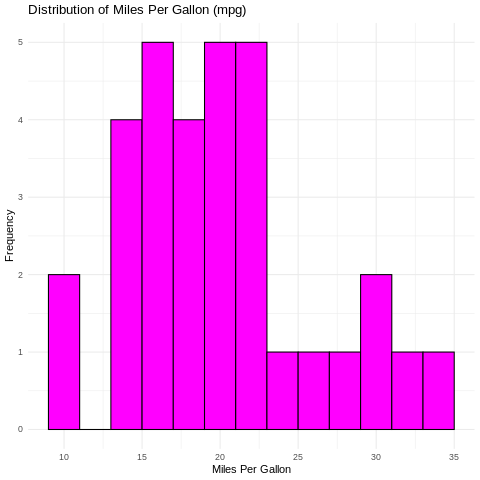

In [13]:
%%R
# Histogram of Miles per Gallon (mpg)
ggplot(data, aes(x = mpg)) +
  geom_histogram(binwidth = 2, fill = "magenta", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of Miles Per Gallon (mpg)", x = "Miles Per Gallon", y = "Frequency")

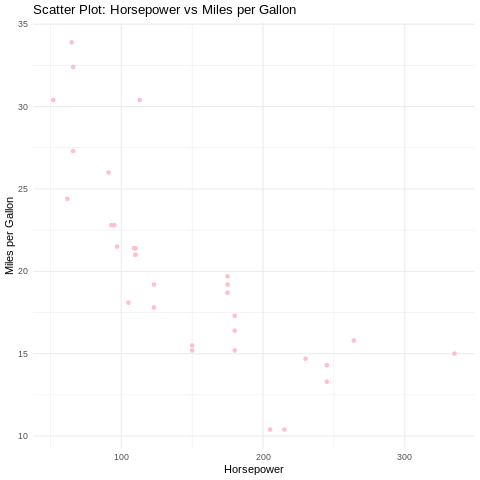

In [14]:
%%R
# Scatter Plot between Horsepower (hp) and Miles per Gallon (mpg)
ggplot(data, aes(x = hp, y = mpg)) +
  geom_point(color = "pink") +
  theme_minimal() +
  labs(title = "Scatter Plot: Horsepower vs Miles per Gallon", x = "Horsepower", y = "Miles per Gallon")

            mpg        cyl       disp         hp        drat         wt
mpg   1.0000000 -0.8521620 -0.8475514 -0.7761684  0.68117191 -0.8676594
cyl  -0.8521620  1.0000000  0.9020329  0.8324475 -0.69993811  0.7824958
disp -0.8475514  0.9020329  1.0000000  0.7909486 -0.71021393  0.8879799
hp   -0.7761684  0.8324475  0.7909486  1.0000000 -0.44875912  0.6587479
drat  0.6811719 -0.6999381 -0.7102139 -0.4487591  1.00000000 -0.7124406
wt   -0.8676594  0.7824958  0.8879799  0.6587479 -0.71244065  1.0000000
qsec  0.4186840 -0.5912421 -0.4336979 -0.7082234  0.09120476 -0.1747159
vs    0.6640389 -0.8108118 -0.7104159 -0.7230967  0.44027846 -0.5549157
am    0.5998324 -0.5226070 -0.5912270 -0.2432043  0.71271113 -0.6924953
gear  0.4802848 -0.4926866 -0.5555692 -0.1257043  0.69961013 -0.5832870
carb -0.5509251  0.5269883  0.3949769  0.7498125 -0.09078980  0.4276059
            qsec         vs          am       gear        carb
mpg   0.41868403  0.6640389  0.59983243  0.4802848 -0.55092507
cyl  -0.59

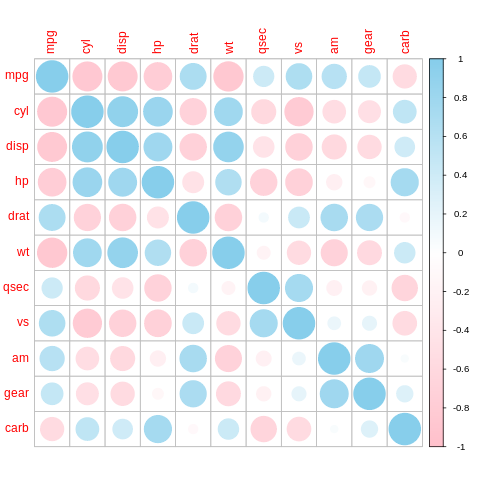

In [15]:
%%R
# Correlation Matrix for mtcars Dataset
cor_matrix <- cor(data %>% select_if(is.numeric))
print(cor_matrix)
corrplot(cor_matrix, method = "circle",col = colorRampPalette(c("pink", "white", "skyblue"))(200))

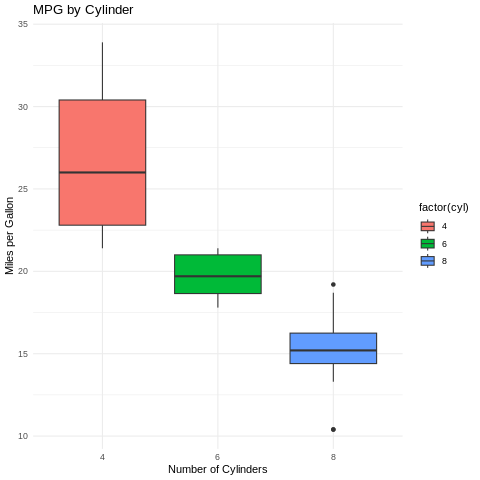

In [16]:
%%R
# Boxplot of mpg by cylinder (cyl)
ggplot(mtcars, aes(x = factor(cyl), y = mpg, fill = factor(cyl))) +
  geom_boxplot() +
  labs(title = "MPG by Cylinder",
       x = "Number of Cylinders",
       y = "Miles per Gallon") +
  theme_minimal()

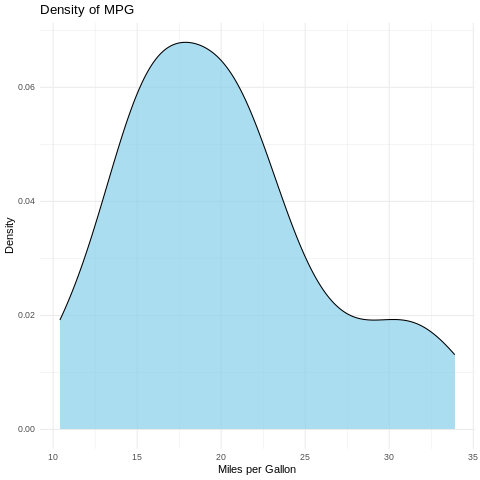

In [17]:
%%R
# Density plot of mpg
ggplot(mtcars, aes(x = mpg)) +
  geom_density(fill = "skyblue", alpha = 0.7) +
  labs(title = "Density of MPG",
       x = "Miles per Gallon",
       y = "Density") +
  theme_minimal()